In [114]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import random
import os
from PIL import ImageDraw

In [116]:
def inference_single_img(img_path):
    interpreter = tf.lite.Interpreter(model_path="./tflite_models/ssd_mobilenet_v2_300_float.tflite")
    interpreter.allocate_tensors()
    
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    input_shape = input_details[0]['shape']
    
    # Test the model on random input data.
    image = plt.imread(img_path)
    img_reshaped = image.reshape((input_shape))
    input_data = np.array(img_reshaped, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)


    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    bbox = interpreter.get_tensor(output_details[0]['index'])
    labels = interpreter.get_tensor(output_details[1]['index'])
    scores = interpreter.get_tensor(output_details[2]['index'])
    ndet = interpreter.get_tensor(output_details[3]['index'])
    
    
    for i in range(10):
        bbox2 = bbox[0][i]*300
        plt.plot(bbox2[0], bbox2[1],'r*')
        plt.plot(bbox2[0], bbox2[3],'r*')
        plt.plot(bbox2[2], bbox2[3],'r*')
        plt.plot(bbox2[2], bbox2[1],'r*')
        
        draw_box(ImageDraw.Draw(image),bbox2)
        
        plt.imshow(image)
    return bbox, labels, scores,ndet



In [115]:
def draw_box(draw, box):
  """Draws the bounding box and label for each object."""
  ymin, xmin, ymax, xmax = box
  draw.rectangle([(xmin,ymin), (xmax, ymax)],
                   outline='red')
   

In [108]:
def input_size(interpreter):
  """Returns input image size as (width, height) tuple."""
  _, height, width, _ = interpreter.get_input_details()[0]['shape']
  return width, height

def input_tensor(interpreter):
  """Returns input tensor view as numpy array of shape (height, width, 3)."""
  tensor_index = interpreter.get_input_details()[0]['index']
  return interpreter.tensor(tensor_index)()[0]


def set_input(interpreter, size, resize):
  """Copies a resized and properly zero-padded image to the input tensor.
  Args:
    interpreter: Interpreter object.
    size: original image size as (width, height) tuple.
    resize: a function that takes a (width, height) tuple, and returns an RGB
      image resized to those dimensions.
  Returns:
    Actual resize ratio, which should be passed to `get_output` function.
  """
  width, height = input_size(interpreter)
  w, h = size
  scale = min(width / w, height / h)
  w, h = int(w * scale), int(h * scale)
  tensor = input_tensor(interpreter)
  tensor.fill(0)  # padding
  _, _, channel = tensor.shape
  tensor[:h, :w] = np.reshape(resize((w, h)), (h, w, channel))
  return scale, scale

In [142]:
def inf_2(img_path):
    image = Image.open(img_path)

    interpreter = tf.lite.Interpreter(model_path="./tflite_models/ssd_mobilenet_v2_300_float.tflite")
    interpreter.allocate_tensors()


    set_input(interpreter, image.size,
                lambda size: image.resize(size, Image.ANTIALIAS))


    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    input_shape = input_details[0]['shape']

    # Test the model on random input data.
   # image = plt.imread(img_path)
   # img_reshaped = image.reshape((input_shape))
   # input_data = np.array(img_reshaped, dtype=np.float32)
   # interpreter.set_tensor(input_details[0]['index'], input_data)


    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    bbox = interpreter.get_tensor(output_details[0]['index'])
    labels = interpreter.get_tensor(output_details[1]['index'])
    scores = interpreter.get_tensor(output_details[2]['index'])
    ndet = interpreter.get_tensor(output_details[3]['index'])

    for i in range(10):
        bbox2 = bbox[0][i]*300
        plt.plot(bbox2[1], bbox2[0],'r*')
        plt.plot(bbox2[3], bbox2[0],'r*')
        plt.plot(bbox2[3], bbox2[2],'r*')
        plt.plot(bbox2[1], bbox2[2],'r*')

       
        ymin, xmin, ymax, xmax = bbox2
        ImageDraw.Draw(image).rectangle([(xmin,ymin), (xmax, ymax)],
                           outline='red')
        plt.imshow(image)
        if np.sum(bbox2) != 0:
            print(bbox2)
    return bbox, labels, scores,ndet



[ 23.412254 179.60901   69.514595 280.25558 ]
[[[0.07804085 0.5986967  0.23171532 0.93418527]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]] [[2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [[0.34313452 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
[1.]


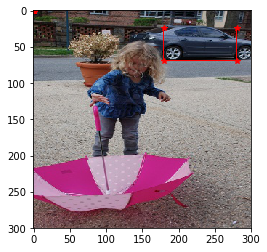

In [200]:
coco_300_folder = "/home/cindy/Documents/projets/MLPerf/datasets/coco/out/val2017"
img_path = os.path.join(coco_300_folder, random.choice(os.listdir(coco_300_folder)))
bbox, labels, scores,ndet = inf_2(img_path)
if np.sum(bbox) != 0:
    print(bbox, labels, scores)
    print(ndet)

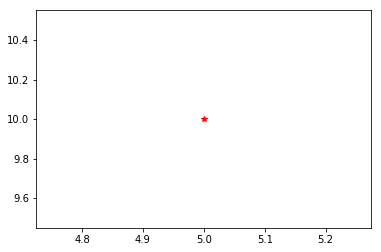

In [141]:
plt.plot(5,10, 'r*')

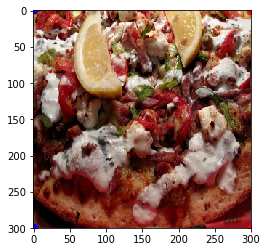

In [72]:
image = plt.imread(img_path)
#bbox = bbox*300
for i in range(10):
    bbox2 = bbox[0][i]*300
    plt.plot(bbox2[0], bbox2[1],'r*')
    plt.plot(bbox2[0], bbox2[3],'r*')
    plt.plot(bbox2[2], bbox2[3],'r*')
    plt.plot(bbox2[2], bbox2[1],'r*')
    
    plt.plot(bbox2[0], bbox2[2],'b*')
    plt.plot(bbox2[0], bbox2[3],'b*')
    plt.plot(bbox2[1], bbox2[2],'b*')
    plt.plot(bbox2[1], bbox2[3],'b*')
    plt.imshow(image)

In [45]:
bbox[0][0]

array([147.38535, 219.17278, 298.10043, 290.27628], dtype=float32)

In [35]:
print(np.sum(bbox))
print(labels)
print(scores)
plt.plot(bbox[0]*300, bbox[1])

0.0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


 	Name 	Description
0 	Locations 	Multidimensional array of [10][4] floating point values between 0 and 1, the inner arrays representing bounding boxes in the form [top, left, bottom, right]
1 	Classes 	Array of 10 integers (output as floating point values) each indicating the index of a class label from the labels file
2 	Scores 	Array of 10 floating point values between 0 and 1 representing probability that a class was detected
3 	Number and detections 	Array of length 1 containing a floating point value expressing the total number of detection results

In [15]:

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="./tflite_models/ssd_mobilenet_v2_300_float.tflite")
interpreter.allocate_tensors()


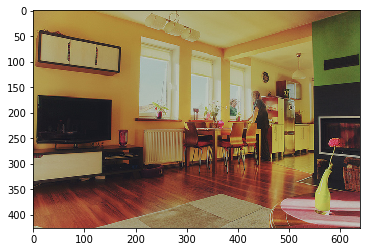

In [17]:
img_path = "./000000000002.jpg"
img_path = "/home/cindy/Documents/projets/MLPerf/datasets/coco/coco/val2017/000000000139.jpg"
image = plt.imread(img_path)
plt.imshow(image)

In [18]:

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [19]:
input_shape = input_details[0]['shape']
img_reshaped = image.reshape((input_shape))

ValueError: cannot reshape array of size 817920 into shape (1,300,300,3)

In [22]:
img_reshaped = image.reshape((1,426,640,3
                             ))

In [6]:
img_reshaped.shape

(1, 300, 300, 3)

In [24]:

# Test the model on random input data.

input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
input_data = np.array(img_reshaped, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)


ValueError: Cannot set tensor: Dimension mismatch. Got 426 but expected 300 for dimension 1 of input 0.

In [8]:

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [13]:
interpreter.get_tensor(output_details[1]['index'])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
output_data(interpreter, 0)

TypeError: <lambda>() takes 0 positional arguments but 2 were given

In [4]:
input_details

[{'name': 'normalized_input_image_tensor',
  'index': 0,
  'shape': array([  1, 300, 300,   3], dtype=int32),
  'shape_signature': array([  1, 300, 300,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [5]:
output_details

[{'name': 'TFLite_Detection_PostProcess',
  'index': 261,
  'shape': array([ 1, 10,  4], dtype=int32),
  'shape_signature': array([ 1, 10,  4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:1',
  'index': 262,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([ 1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:2',
  'index': 263,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([ 1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': 